# Data Visualization 

## 순서

__1. Figure and subplot__

__2. style__

__3. font and color__

### Setting

In [32]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

### Data load

In [33]:
spotify_data = pd.read_csv('spotify.csv', index_col='Date', parse_dates=True)
feature = pd.read_csv('feature_importances.csv')
feature = feature[['feature', 'average']][:15]

In [34]:
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


## 1. Figure and subplot

Matplotlib로 plot은 전체적으로 다음과 같이 구성되어 있다.

<br>
<div align="center">
    <img src="https://3.bp.blogspot.com/-AtPG_12l4e8/XRSuQEECZGI/AAAAAAAAHxY/ZsgtA4rMphMZujcWUur9BB-xYKoWDkKPQCLcBGAs/s1600/basics_matplotlib.PNG" width="400">
    <br>
    <font color=gray><i>Elements of Graph by Deepanshu Bhalla </i><font>
</div>
<br>

### 1-1. Figure 

그래프가 그려질 전체 도화지(canvas)라고 볼 수 있다. figure 안에 하나 이상의 axes가 존재하게 된다.

### 1-2. Axes 

figure 안에 위치하는 하나의 그래프(plot)를 의미한다.


<br>
<div align="center">
    <img src="https://2.bp.blogspot.com/-F__I5bCe3uI/XRS1Y3gdP9I/AAAAAAAAHxk/plElt8VRYRMp42BuHTe9wkD29hZaPvo-ACLcBGAs/s1600/figure_axes.PNG" width="400">
    <br>
    <font color=gray><i>Figure example by Deepanshu Bhalla </i><font>
</div>
<br>

### 1-3. Axis

말 그대로 그래프의 축(x, y축)을 의미한다. 즉 하나의 Axes는 2개(3D인 경우, 3개) Axis를 갖게 된다.

matplotlib에서 plot을 그리는 __표준적인 방법__은 __객체 지향 형태__로 작성하도록 권장하고 있다.
1. `figure`를 생성하고
2. 하나 이상의 `axes` 객체를 생성한다. 
3. 생성된 `axes` 객체의 헬퍼 함수로 primitives 를 정의한다.


<i>
** primitives란??

Line2D, Rectangle, Text, AxesImage, Patch 등과 같이 캔버스에 그려지는 표준 그래픽 객체, 그래프를 어떻게 그릴지 정의하는 객체라고 볼 수 있다.
</i>

아래는 전체적인 Figure의 구성요소를 나타낸 그림이다.

<br>
<div align="center">
    <img src="https://matplotlib.org/_images/anatomy1.png" width="600">
    <br>
    <font color=gray><i>Part of a Figure</i><font>
</div>
<br>


__생성함수__

* `plt.figure` : 새로운 figure을 생성.
* `plt.subplots` : figure 생성과 subplot 분할을 동시에 수행한다. `plt.figure`에서 설정할 수 있는 figure 파라미터를 함께 넣을 수 있다.
* `plt.subplot` : 이미 생성된 figure에 subplot을 만든다.
* 이 외에도 `Gridspec`이나 `plt.add_subplot`을 이용해서도 생성 가능하다.<br>
* `plt.plot()` 함수는 Axes에 포함되는 `Line2D` 함수를 만들어준다. 만약 `Figure`과 `Axes` 가 없다면 이를 생성한다. 이후 `plt.xxxx`로 설정한 내용은 여기서에서 생성된 `Axes`의 설정값으로 쓰인다.(`plt.gca()`로 현재 생성된 `Axes`를 불러올 수 있다)
* `seaborn`으로 plot을 만들면 axes가 return 된다 -> seaborn으로 plot을 만든 후, `Axes` 설정값을 수정하는 함수를 적용할 수 있다.

#### plt의 대표적인 파라미터

* `title` : plt의 제목
* `xlable` / `ylabel` : x,y 축 제목
* `xlim` / `xticks` : x축의 처음값과 끝값 / 간격 설정
* `ylim` / `yticks` : y축의 처음값과 끝값 / 간격 설정
* `grid` : 격자 눈금선
* `legend` : 범례표시, 범례를 출력하기 위해서는 plot 안의 label 값이 있어야한다.


** plot에 들어가는 text는 `rotation`으로 가로/세로 방향을 설정할 수 있다.<br>
** title과 legend은 loc 으로 위치를 설정할 수 있으며, 아래의 값을 넣을 수 있다.

* title : {'center', 'left', 'right'}

* legned : {'upper', 'center', 'lower'} + {'center', 'left', 'right'}. 
__ex) `plt.legend(loc='upper left')`__

먼저 `figure`에 파라미터를 설정해서 plot을 만들 수 있다. `figure`에 적용하기 위해서는 `plt.xxxx`를 사용해서 원하는 파라미터를 설정한다.

In [57]:
#하나의 figure만 생성해서 plot을 그림
def sinplot(flip=1):
    fig = plt.figure(figsize=(8,4), facecolor='w') #facecolor는 figure의 여백 색 설정
    #ax = plt.subplot(111)
    plt.title('Sinplot', loc='center')
    #plt.title('Sinplot', x=0, y=0)  #x축 y축 좌표를 직접 입력해서 위치 조정 가능.
    plt.xlim(0, 10)
    plt.xticks(ticks=[0,5,10])
    plt.ylim(-4, 4)
    ticks_list = [-4,-2,0,2,4]
    plt.yticks(ticks=ticks_list, labels= ['y : {}'.format(i) for i in ticks_list])
    plt.ylabel('y Value', rotation=0, y=1.1)
    plt.grid(True)
    print(plt.gca())
    plt.tight_layout() #공백을 삭제 -> Axes 크기가 커짐.
    #plt.legend()
    
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
    plt.gca().spines['top'].set_visible(False) #현재 Axes에서 top 위치의 spines를 삭제한다.
    print(plt.gca()) #현재 figure에 생성된 Axes 출력

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.114345,0.0965278;0.855946x0.75575)


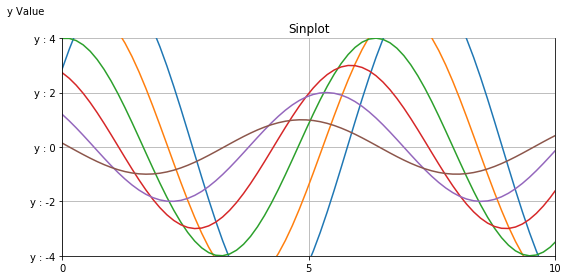

In [58]:
sinplot()

subplot `Axes`에 파라미터를 적용할 경우, `ax.set_xxxx`를 사용한다. 

In [37]:
def subplot(ax=4, sharex=False, sharey=False, adjust=False):
    fig, ax = plt.subplots(2,2, figsize=(10,6), facecolor='w', sharex=sharex, sharey=sharey)
    
    for i in range(2):
        for j in range(2):
            try:
                col = spotify_data.columns[i+j]
                sns.lineplot(x=spotify_data.index, y=col, data=spotify_data, ax=ax[i][j])
                ax[i][j].set_title(col)
                if sharey:
                    ax[i][j].set_ylabel('')
            except:
                break
    if adjust:
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

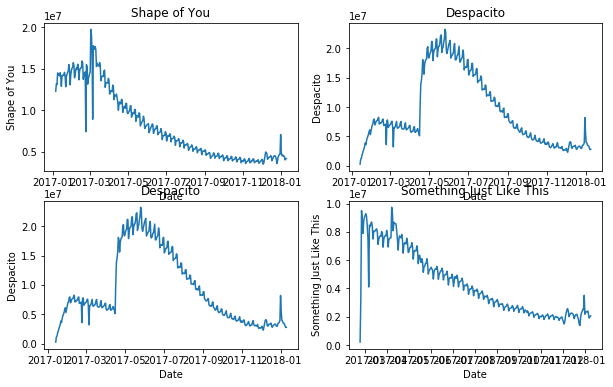

In [38]:
subplot(4)

* `plt.subplots_adjust(wspace=, hspace=)`로 subplot 간의 간격을 조정할 수 있다. `wspace`는 너비 간격, `hspace`는 높이 간격을 설정한다.

* 이때 유의할 점은, subplot 간격을 늘려도, figsize는 동일하므로 각 subplot의 크기가 작아진다.

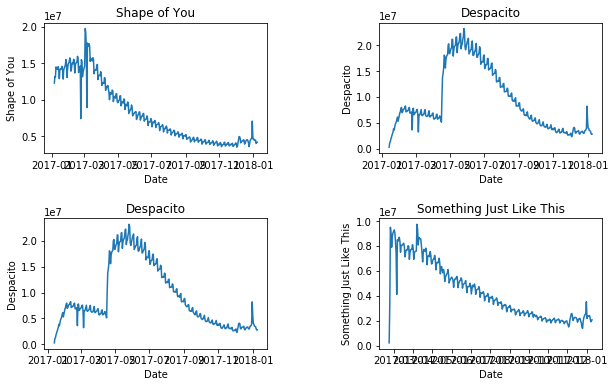

In [39]:
subplot(4, adjust=True)

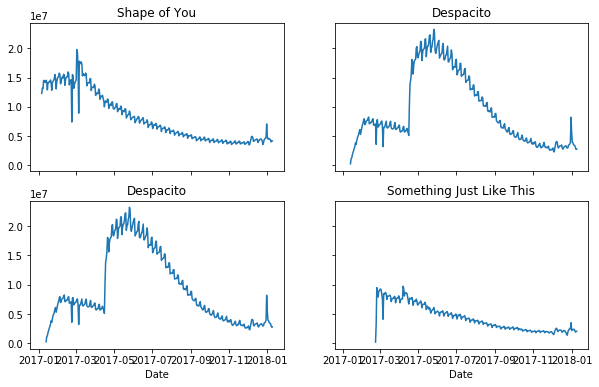

In [40]:
subplot(4, sharex=True, sharey=True)

Axis(축)에 설정을 적용하기 위해서는 `DateFormatter`를 사용한다. 


특히 축에 시간이 들어가는 경우, 간격을 조절할 수 있는 특수한 방법이 존재한다. `DateFormatter`으로 표기 형태를 정의하고, `set_major_formatter`로 plot에 적용하면 원하는 형태의 날짜로 표기할 수 있다.

* matplotlib.dates 관련 document : [Link](https://matplotlib.org/3.1.1/api/dates_api.html?highlight=monthlocator#matplotlib.dates.MonthLocator)

In [41]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

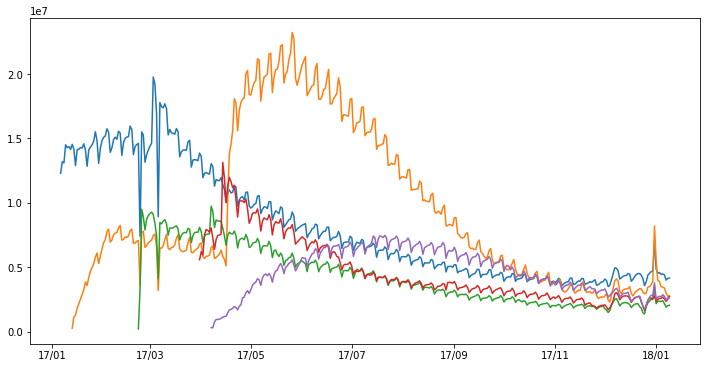

In [42]:
#fig = plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6))
for i in spotify_data.columns:
    ax.plot(spotify_data.index, spotify_data[i])
    date_form = DateFormatter("%y/%m")
    ax.xaxis.set_major_formatter(date_form)

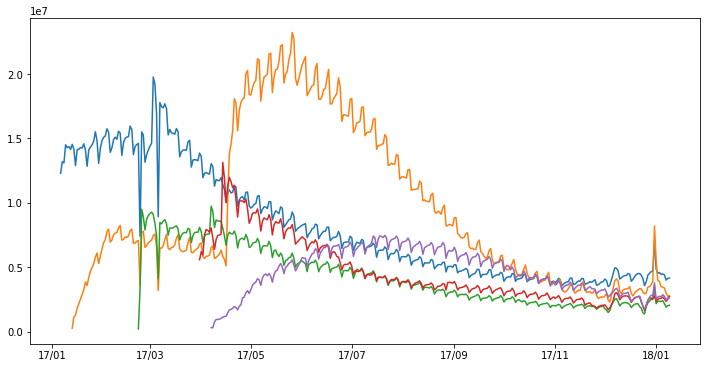

In [43]:
#fig = plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6))
for i in spotify_data.columns:
    ax.plot(spotify_data.index, spotify_data[i])
    date_form = DateFormatter("%y/%m")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

위의 방법을 사용하지 않고 `set_xticks`으로 직접 축을 만들 수도 있다.

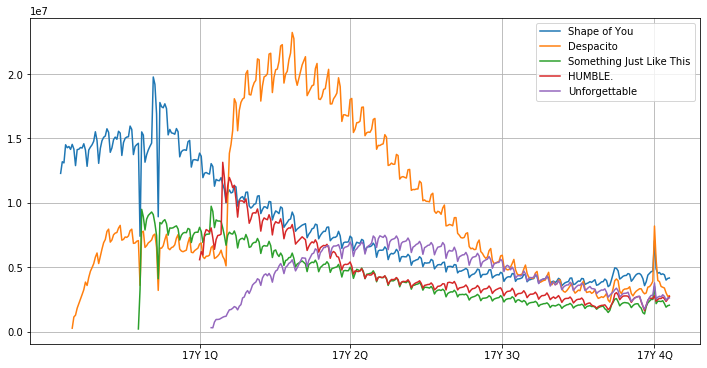

In [73]:
#fig = plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6))
for i in spotify_data.columns:
    ax.plot(spotify_data.index, spotify_data[i], label=i)
    ax.set_xticks(ticks=['20170331', '20170630', '20170930', '20171231'])
    ax.set_xticklabels(['17Y 1Q', '17Y 2Q', '17Y 3Q', '17Y 4Q'])
    ax.grid(True)
    ax.legend()

## 2. Style

matplotlib와 seaborn에서 사용하는 style을 지정할 수 있다. matplotlib의 style은 전체적인 plot style을 바꿔주며, 사용할 수 있는 style은 아래와 같다.

In [45]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


seaborn 에서는 3가지 style 설정을 나눠서 제공하고 있다.

* 표 style : 5개 (__"darkgrid", "whitegrid", "dark", "white", "ticks"__)을 제공한다.


* plot color : `sns.color_palette`로 원하는 색조합을 사용할 수도 있다. 관련 내용은 [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)를 참고.


* contents stlye : 4개(__"notebook"“paper”, “talk”,“poster"__)을 제공한다. default는 "notebook"이다.


자세한 과정은 [Seaborn Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)를 참고하면 좋다.

Default 스타일을 지정하는 방법은 다음과 같다.

* `plt.style.use('default')`
* `sns.set_style('ticks')`

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.10565,0.0918056;0.865913x0.763694)


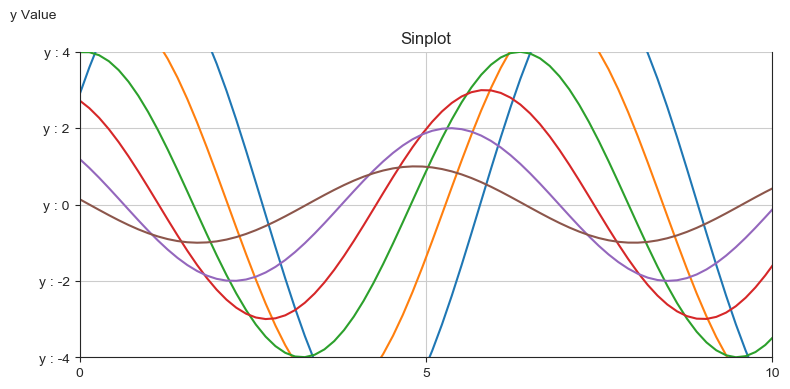

In [87]:
sinplot()

In [92]:
plt.style.use('fivethirtyeight')

AxesSubplot(0.08,0.07;0.87x0.81)
AxesSubplot(0.142152,0.109653;0.818083x0.699347)


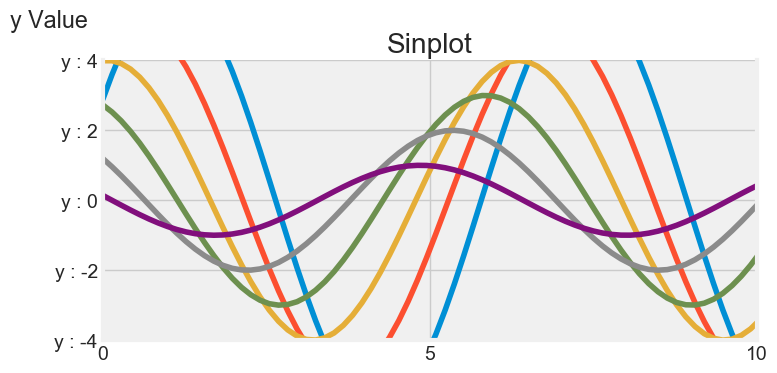

In [93]:
sinplot()

In [90]:
sns.set_style('dark')
#sns.set(style='dark')

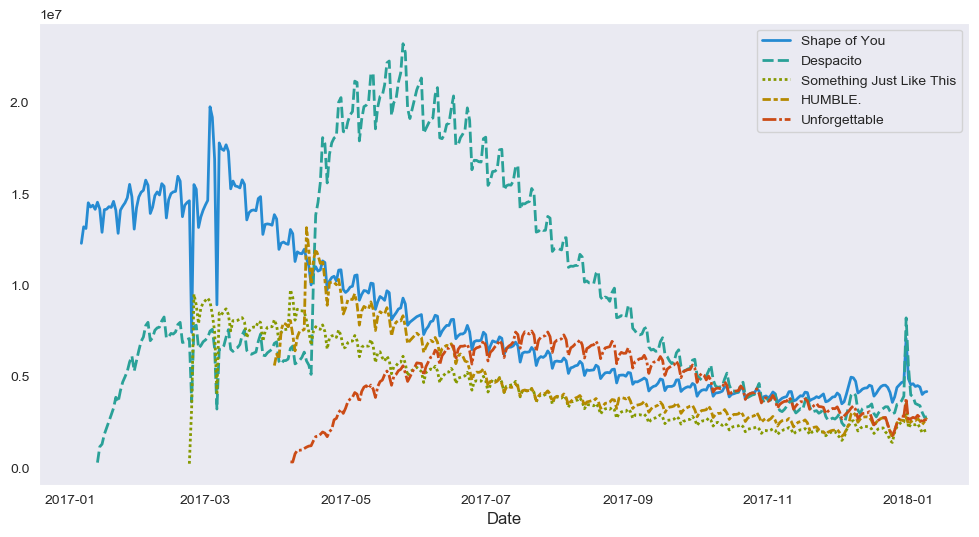

In [91]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)

In [83]:
plt.style.use('default')

Seaborn에서 특정 style을 개별적으로 적용하고 싶을 경우, `sns.axes_style`을 사용한다.

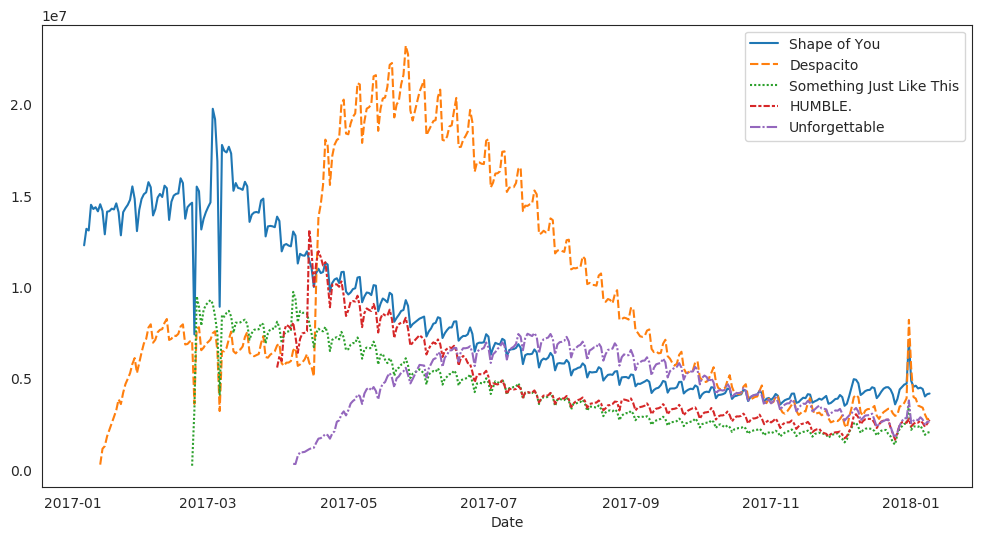

In [84]:
with sns.axes_style("white"):
    fig = plt.figure(figsize=(12,6))
    sns.lineplot(data=spotify_data)

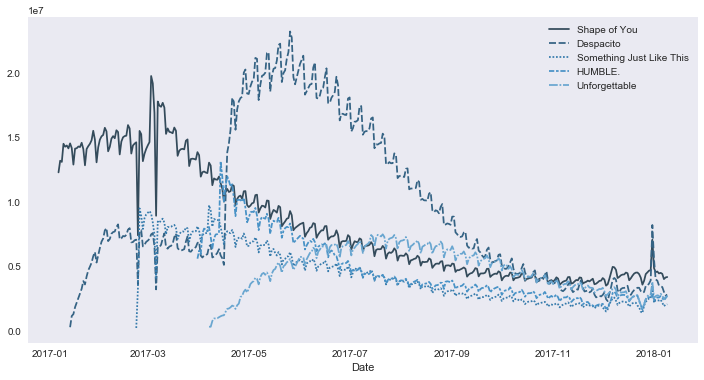

In [21]:
with sns.color_palette("Blues_d"):
    fig = plt.figure(figsize=(12,6))
    sns.lineplot(data=spotify_data)

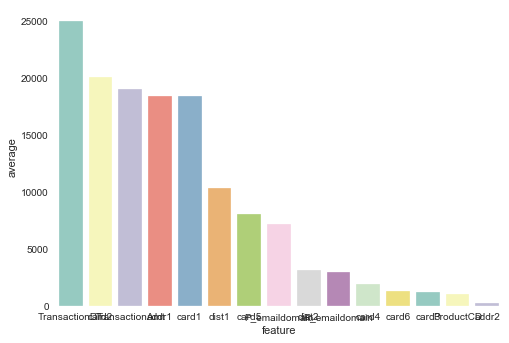

In [23]:
with sns.axes_style("white"):    
    count = sns.barplot(x='feature', y='average', data=feature.sort_values('average', ascending=False), palette='Set3')

`sns.set_context`로 context style를 변경한다.

In [24]:
sns.set_context('notebook')

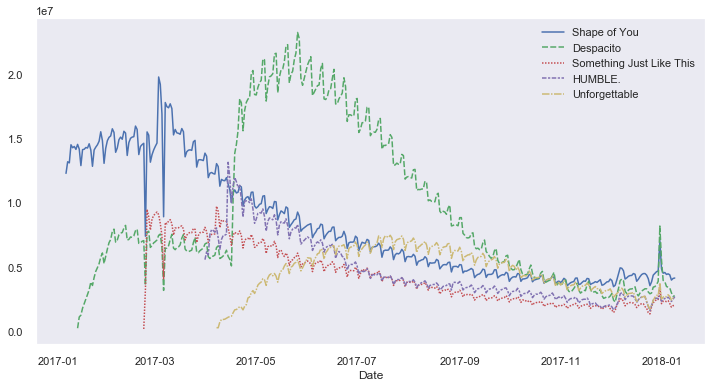

In [25]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(data=spotify_data)
#sns.despine(offset=10, trim=True);

### 3. Font and Color

많이 사용하는 font 옵션([참고 document](https://matplotlib.org/3.1.1/tutorials/text/text_props.html))

1. 크기 : fontsize 
2. 색상 : color
3. 기울임 : fontstyle, [ 'normal' | 'italic' | 'oblique' ]
4. 굴게/가늘게 : fontweight, 	[ 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']

많이 사용하는 color 값이며 목록을 출력할 수 있는 방법은 아래와 같다.

```
    [('black', '#000000'),
     ('navy', '#000080'),
     ('darkblue', '#00008B'),
     ('mediumblue', '#0000CD'),
     ('blue', '#0000FF'),
     ('darkgreen', '#006400'),
     ('green', '#008000'),
     ('teal', '#008080'),
     ('darkcyan', '#008B8B'),
     ('deepskyblue', '#00BFFF'),
     ('darkturquoise', '#00CED1'),
     ('mediumspringgreen', '#00FA9A'),
     ('lime', '#00FF00'),
     ('springgreen', '#00FF7F'),
     ('aqua', '#00FFFF'),
     ('cyan', '#00FFFF'),
     ('midnightblue', '#191970'),
     ('dodgerblue', '#1E90FF'),
     ('lightseagreen', '#20B2AA'),
     ('forestgreen', '#228B22'),
     ('seagreen', '#2E8B57'),
     ('darkslategray', '#2F4F4F'),
     ('darkslategrey', '#2F4F4F'),
     ('limegreen', '#32CD32'),
     ('mediumseagreen', '#3CB371'),
     ('turquoise', '#40E0D0'),
     ('royalblue', '#4169E1'),
     ('steelblue', '#4682B4'),
     ('darkslateblue', '#483D8B'),
     ('mediumturquoise', '#48D1CC'),
     ('indigo', '#4B0082'),
     ...]
```

In [26]:
colorname= []
colorid = []

for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

zippedcolors = list(zip(colorname, colorid))
zippedcolors = sorted(zippedcolors, key=lambda x: x[1])
#print(zippedcolors)

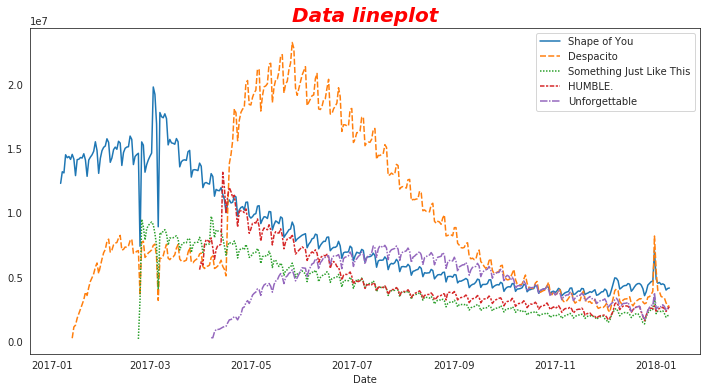

In [48]:
with sns.axes_style("white"):
    fig = plt.figure(figsize=(12,6))
    plt.title('Data lineplot', fontsize=20, color='Red', fontweight="bold", fontstyle='italic')
    line = sns.lineplot(data=spotify_data)

## 번외.

matplotlib를 사용해서 plot을 만들경우, 특정 영역에만 색을 변경할 수 있다.

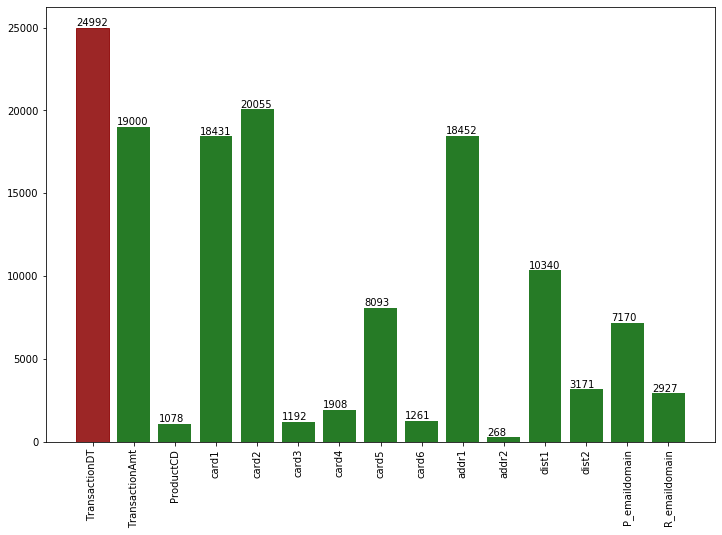

In [70]:
fig = plt.figure(figsize=(12,8))
bars = plt.bar(feature['feature'], feature['average'], color = 'darkgreen', alpha = 0.85)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, int(yval), va='bottom') #va: vertical alignment y positional argument
    
bars[0].set_color('darkred')
plt.xticks(rotation=90)


plt.show()

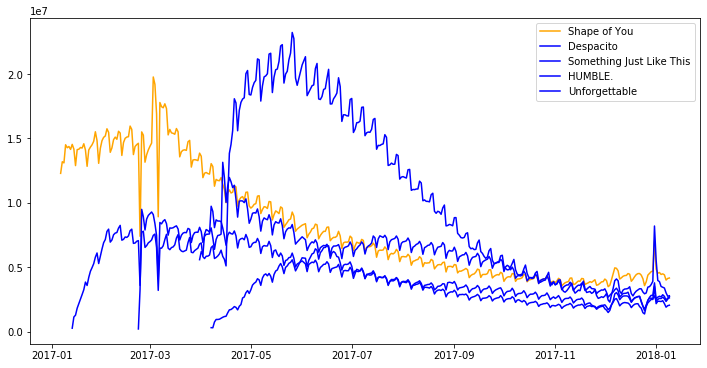

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
for i in spotify_data.columns:
    ax.plot(spotify_data.index, spotify_data[i], label=i, color= 'blue' if (i != 'Shape of You') else 'orange')
    ax.legend()

### 참고 사이트 

* [https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/](https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/)
* [Top 5 tricks to make plots look better.](https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08)
* [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)
* [MATPLOTLIB TUTORIAL : LEARN WITH EXAMPLES IN 3 HOURS](https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html)
* [Matplotlib Doc](https://matplotlib.org/faq/usage_faq.html#usage)
* [Matplotlib 사용법](https://jrcho.github.io/2018/01/20/Ch.4.matplotlib.html)